<a href="https://colab.research.google.com/github/jagmal1/Face_mask-detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jagmalr","key":"a167874ecf0ce14a2dc9268b2a6c1de3"}'}

In [4]:
#creating a kagggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [6]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#APT fatch & unzip
!kaggle datasets download -d omkargurav/face-mask-dataset -p /content/face_mask_dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:01<00:00, 150MB/s]
100% 163M/163M [00:01<00:00, 143MB/s]


In [8]:
#creatint a list that contain
import os

dataset_path = "/content/face_mask_dataset"
print("Files in dataset folder:", os.listdir(dataset_path))


Files in dataset folder: ['data']


In [9]:
!ls

face_mask_dataset  kaggle.json	sample_data


In [10]:
# list with mask
filenames_with_mask= os.listdir('/content/face_mask_dataset/data/with_mask')
print(filenames_with_mask)

['with_mask_3289.jpg', 'with_mask_3029.jpg', 'with_mask_1270.jpg', 'with_mask_684.jpg', 'with_mask_957.jpg', 'with_mask_382.jpg', 'with_mask_3392.jpg', 'with_mask_1272.jpg', 'with_mask_2854.jpg', 'with_mask_313.jpg', 'with_mask_2475.jpg', 'with_mask_3035.jpg', 'with_mask_3359.jpg', 'with_mask_1333.jpg', 'with_mask_1107.jpg', 'with_mask_2162.jpg', 'with_mask_2566.jpg', 'with_mask_2081.jpg', 'with_mask_1798.jpg', 'with_mask_2661.jpg', 'with_mask_3484.jpg', 'with_mask_849.jpg', 'with_mask_2086.jpg', 'with_mask_2398.jpg', 'with_mask_3262.jpg', 'with_mask_3400.jpg', 'with_mask_1188.jpg', 'with_mask_269.jpg', 'with_mask_3510.jpg', 'with_mask_679.jpg', 'with_mask_325.jpg', 'with_mask_2411.jpg', 'with_mask_2530.jpg', 'with_mask_3100.jpg', 'with_mask_2909.jpg', 'with_mask_1846.jpg', 'with_mask_33.jpg', 'with_mask_847.jpg', 'with_mask_2299.jpg', 'with_mask_411.jpg', 'with_mask_241.jpg', 'with_mask_1376.jpg', 'with_mask_2325.jpg', 'with_mask_3523.jpg', 'with_mask_2885.jpg', 'with_mask_1968.jpg', 

In [11]:
#list without mask
filenames_without_mask = os.listdir("/content/face_mask_dataset/data/without_mask")
print(filenames_without_mask)

['without_mask_3675.jpg', 'without_mask_3292.jpg', 'without_mask_1874.jpg', 'without_mask_1476.jpg', 'without_mask_3454.jpg', 'without_mask_2373.jpg', 'without_mask_197.jpg', 'without_mask_1912.jpg', 'without_mask_700.jpg', 'without_mask_2215.jpg', 'without_mask_1602.jpg', 'without_mask_2277.jpg', 'without_mask_2678.jpg', 'without_mask_15.jpg', 'without_mask_803.jpg', 'without_mask_342.jpg', 'without_mask_1101.jpg', 'without_mask_2558.jpg', 'without_mask_133.jpg', 'without_mask_3166.jpg', 'without_mask_2264.jpg', 'without_mask_1803.jpg', 'without_mask_3113.jpg', 'without_mask_596.jpg', 'without_mask_1353.jpg', 'without_mask_708.jpg', 'without_mask_2495.jpg', 'without_mask_969.jpg', 'without_mask_2305.jpg', 'without_mask_2548.jpg', 'without_mask_2714.jpg', 'without_mask_1369.jpg', 'without_mask_748.jpg', 'without_mask_3602.jpg', 'without_mask_210.jpg', 'without_mask_702.jpg', 'without_mask_1529.jpg', 'without_mask_1268.jpg', 'without_mask_1893.jpg', 'without_mask_351.jpg', 'without_mask

In [12]:
#counting no of file in each directory
no_of_with_mask=len(filenames_with_mask)
no_of_without_mask=len(filenames_without_mask)
print('Number of images with mask', no_of_with_mask)
print('Number of images without mask', no_of_without_mask)


Number of images with mask 3725
Number of images without mask 3828


Importing the dependencies


In [13]:
import numpy as np
from PIL import Image #importing image from pillow library
import matplotlib.image as mpimg  # used for ploting graphs
import matplotlib.pyplot as plt
import sklearn
#from sklearn.modern_selection import train_test_split

In [14]:
from sklearn import model_selection


In [14]:
#!pip install -U scikit-learn

In [15]:
from sklearn.model_selection import train_test_split

Creating labels for two class of images

In [16]:
with_mask_labels=[1]*3725
print(with_mask_labels)

len(with_mask_labels)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

3725

In [17]:
without_mask_labels=[0]*3828
print(without_mask_labels)
len(without_mask_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

3828

In [18]:
labels = with_mask_labels + without_mask_labels
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
print(len(labels))

7553


1 for with mask

0 for without mask

Understanding the image **dataset**

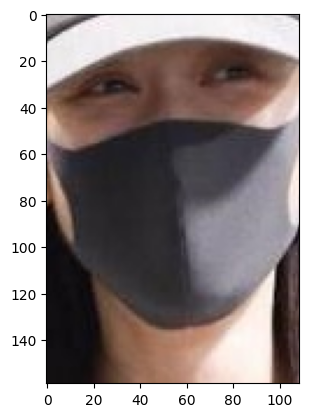

In [20]:
# displaying the images with wearing masks
img=mpimg.imread('/content/face_mask_dataset/data/with_mask/with_mask_1007.jpg')
plt.imshow(img)

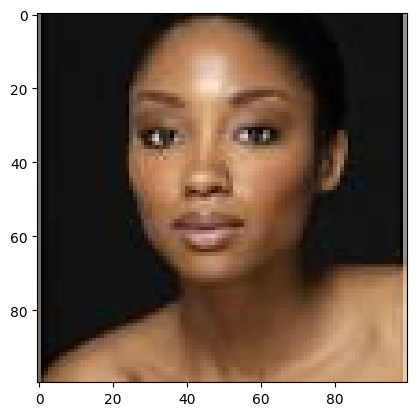

In [21]:
# displaying the images without wearing masks
img=mpimg.imread('/content/face_mask_dataset/data/without_mask/without_mask_1007.jpg')
plt.imshow(img)

** Now making images in one dimension

Resizinf all images and saving these image sin different folders

In [22]:
# creating empty directories for resized images
os.mkdir('with_mask_resized') # mkdir for making directories
os.mkdir('without_mask_resized')

In [23]:
# #resized with mask images

# with_mask_folder = '/content/face_mask_dataset/data/with_mask/'
# with_mask_resized_folder = '/content/with_mask_resized/'

# for filename in os.listdir(with_mask_folder):

#   img_path = with_mask_folder+filename
#   img = Image.open(img_path)
#   img = img.resize((128,128))
#   img = img.convert('RGB')

# newImgPath = with_mask_resized_folder+filename
# img.save(newImgPath)

#resized with mask images

with_mask_folder ='/content/face_mask_dataset/data/with_mask/'
with_mask_resized_folder='/content/with_mask_resized/'

for filename in os.listdir(with_mask_folder):

  img_path = with_mask_folder+filename
  img = Image.open(img_path)

  img = img.resize((128,128))   # Image.Resampling.LANCZOS
  img = img.convert('RGB')

  newImgPath = with_mask_resized_folder+filename
  img.save(newImgPath)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
#resized without mask images

without_mask_folder ='/content/face_mask_dataset/data/without_mask/'
without_mask_resized_folder='/content/without_mask_resized/'

for filename in os.listdir(without_mask_folder):

  img_path = without_mask_folder+filename
  img = Image.open(img_path)

  img = img.resize((128,128))
  img = img.convert('RGB')

  newImgPath = without_mask_resized_folder+filename
  img.save(newImgPath)


Resized Images

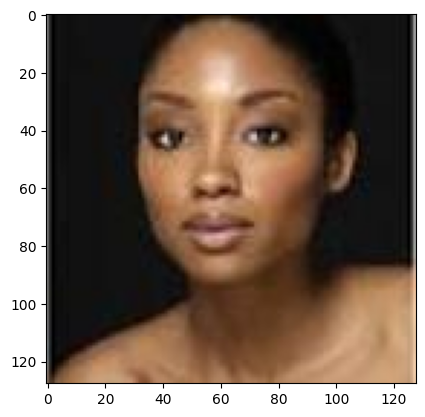

In [25]:
img=mpimg.imread('/content/without_mask_resized/without_mask_1007.jpg')
plt.imshow(img)

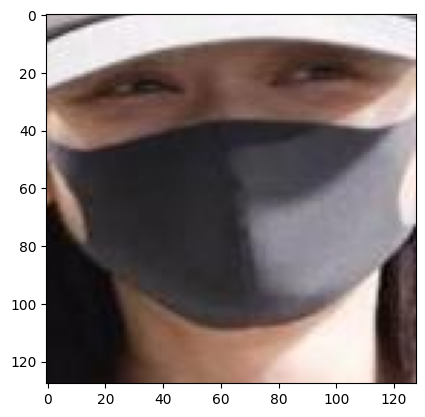

In [26]:
img=mpimg.imread('/content/with_mask_resized/with_mask_1007.jpg')
plt.imshow(img)

**Converting image to numpy array**

In [27]:
import cv2
import glob #library for image recognition

In [28]:
#reading with mask images
imdir='/content/with_mask_resized/'
#imlist=glob.glob(imdir+'*.jpg')
ext=['jpg','png']
files=[]
[files.extend(glob.glob(imdir+'*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])



In [29]:
#reading without mask images
imdir='/content/without_mask_resized/'

ext=['jpg','png']
files=[]
[files.extend(glob.glob(imdir+'*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(with_mask_images)

[[[[255 253 255]
   [255 253 255]
   [255 253 255]
   ...
   [251 255 255]
   [251 255 255]
   [251 255 255]]

  [[255 253 255]
   [255 253 255]
   [255 253 255]
   ...
   [251 255 255]
   [251 255 255]
   [251 255 255]]

  [[255 253 255]
   [255 254 255]
   [255 254 255]
   ...
   [253 255 255]
   [253 255 255]
   [253 255 255]]

  ...

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 254 255]
   [255 254 255]
   [255 254 255]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 253 255]
   [255 254 255]
   [255 254 255]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 253 255]
   [255 254 255]
   [255 254 255]]]


 [[[204 215 219]
   [212 223 227]
   [207 218 226]
   ...
   [109 122 130]
   [107 120 128]
   [107 120 128]]

  [[198 209 213]
   [208 219 223]
   [206 218 224]
   ...
   [104 117 125]
   [103 116 124]
   [102 115 123]]

  [[193 202 206]
   [203 214 218]
   [204 216 222]
   ...
   [100 113 121]
   [ 99 112 120]
   [ 98 111

In [31]:
print(without_mask_images)

[[[[250 255 235]
   [255 255 247]
   [255 234 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[249 255 238]
   [255 255 252]
   [255 239 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[249 252 243]
   [255 251 255]
   [255 237 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[251 252 255]
   [250 252 252]
   [255 255 248]
   ...
   [103 103  49]
   [101 102  46]
   [ 97  99  40]]

  [[252 253 255]
   [251 253 253]
   [255 255 248]
   ...
   [ 90  90  36]
   [ 86  87  31]
   [ 80  82  23]]

  [[253 254 255]
   [252 254 254]
   [255 255 248]
   ...
   [ 81  81  27]
   [ 75  76  20]
   [ 67  69  10]]]


 [[[182 203 234]
   [181 202 233]
   [181 202 233]
   ...
   [140 153 185]
   [147 156 189]
   [151 160 193]]

  [[181 202 233]
   [181 202 233]
   [181 202 233]
   ...
   [150 161 193]
   [149 158 191]
   [148 157 190]]

  [[179 200 231]
   [179 200 231]
   [180 201 232]
   ...
   [157 168 200]
   [154 163 196]
   [150 159

In [32]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [35]:
combined_images=np.concatenate((with_mask_images,without_mask_images))
print(combined_images.shape)

(7553, 128, 128, 3)


In [37]:
from re import X
#data & labels
X=combined_images
Y=np.asarray(labels)

Spliting Taining data & Test data

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [49]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [50]:
#Normalizing/Standardizing the data

X_train_sd = X_train/255
Y_train_sd = Y_train/255
X_test_sd = X_test/255
Y_test_sd = Y_test/25

In [51]:
print(X_train_sd)

[[[[1.         0.76862745 0.70196078]
   [0.89019608 0.62745098 0.56862745]
   [0.65098039 0.41176471 0.35686275]
   ...
   [0.15294118 0.09411765 0.08627451]
   [0.16078431 0.10196078 0.09411765]
   [0.16470588 0.10588235 0.09803922]]

  [[0.85882353 0.6        0.52941176]
   [0.71372549 0.45882353 0.4       ]
   [0.50588235 0.27058824 0.22352941]
   ...
   [0.15294118 0.09411765 0.08627451]
   [0.15686275 0.09803922 0.09019608]
   [0.15686275 0.09803922 0.09019608]]

  [[0.63137255 0.39607843 0.33333333]
   [0.50980392 0.27843137 0.21568627]
   [0.35294118 0.1372549  0.08627451]
   ...
   [0.15294118 0.09411765 0.08627451]
   [0.15294118 0.09411765 0.08627451]
   [0.14901961 0.09019608 0.08235294]]

  ...

  [[0.15686275 0.07843137 0.0745098 ]
   [0.17254902 0.09411765 0.09019608]
   [0.17647059 0.10588235 0.10196078]
   ...
   [0.39215686 0.32941176 0.33333333]
   [0.38039216 0.31372549 0.3254902 ]
   [0.30196078 0.23529412 0.24705882]]

  [[0.16078431 0.08235294 0.07843137]
   [0.1

In [52]:
print(X_train_sd[0])

[[[1.         0.76862745 0.70196078]
  [0.89019608 0.62745098 0.56862745]
  [0.65098039 0.41176471 0.35686275]
  ...
  [0.15294118 0.09411765 0.08627451]
  [0.16078431 0.10196078 0.09411765]
  [0.16470588 0.10588235 0.09803922]]

 [[0.85882353 0.6        0.52941176]
  [0.71372549 0.45882353 0.4       ]
  [0.50588235 0.27058824 0.22352941]
  ...
  [0.15294118 0.09411765 0.08627451]
  [0.15686275 0.09803922 0.09019608]
  [0.15686275 0.09803922 0.09019608]]

 [[0.63137255 0.39607843 0.33333333]
  [0.50980392 0.27843137 0.21568627]
  [0.35294118 0.1372549  0.08627451]
  ...
  [0.15294118 0.09411765 0.08627451]
  [0.15294118 0.09411765 0.08627451]
  [0.14901961 0.09019608 0.08235294]]

 ...

 [[0.15686275 0.07843137 0.0745098 ]
  [0.17254902 0.09411765 0.09019608]
  [0.17647059 0.10588235 0.10196078]
  ...
  [0.39215686 0.32941176 0.33333333]
  [0.38039216 0.31372549 0.3254902 ]
  [0.30196078 0.23529412 0.24705882]]

 [[0.16078431 0.08235294 0.07843137]
  [0.17254902 0.09411765 0.09019608]


Building the Neural Netwaork

In [53]:
import tensorflow as tf
import keras


In [54]:
model = keras.Sequential([

                          keras.layers.Flatten(input_shape=(128,128,3)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(2,activation='softmax')
])

In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.fit(X_train_sd,Y_train,epochs=30)

Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.6026 - loss: 2.3229
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.7904 - loss: 0.4872
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8473 - loss: 0.3500
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.8395 - loss: 0.3807
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.8753 - loss: 0.3151
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8698 - loss: 0.3275
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.8808 - loss: 0.3025
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.8655 - loss: 0.3152
Epoch 9/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8886 - loss: 0.2886
Epoch 10/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.8776 - loss: 0.3026
Epoch 11/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8983 - loss: 0.2519
Epoch 12/30
189/189 ━━━━━━━━━━

In [57]:
score,acc=model.evaluate(X_test_sd,Y_test)
print('Test data loss:',score)
print('Test accuracy:',acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9045 - loss: 0.2515
Test data loss: 0.25442278385162354
Test accuracy: 0.8994043469429016


Building a Predictive System

In [58]:
from google.colab.patches import cv2_imshow # imshow does not work with google.colab so we import cv2_imshow

Path of the image to be predictec:/content/Screenshot 2024-12-30 at 2.29.27 PM.png


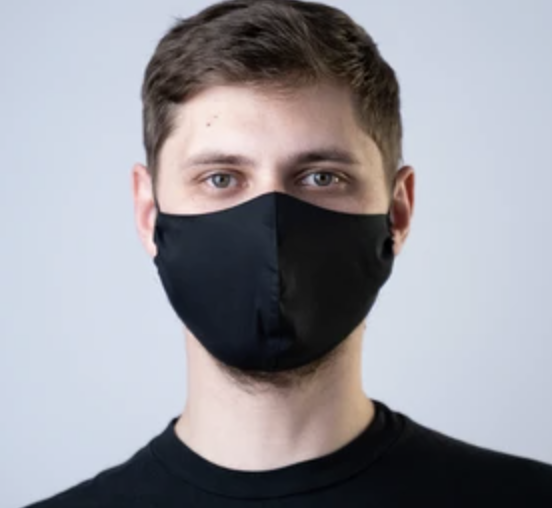

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The person is wearing mask


In [64]:
imput_image_path = input('Path of the image to be predictec:')
imput_image = cv2.imread(imput_image_path)
cv2_imshow(imput_image)

input_image_resized = cv2.resize(imput_image,(128,128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')

Path of the image to be predictec:/content/Screenshot 2024-11-22 at 6.49.09 PM.png


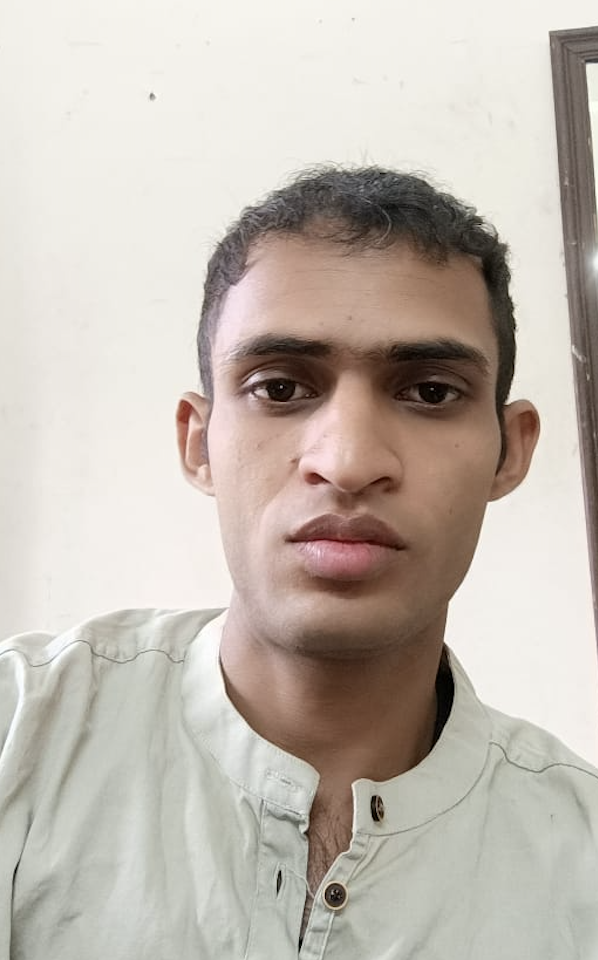

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The person is not wearing mask


In [65]:
imput_image_path = input('Path of the image to be predictec:')
imput_image = cv2.imread(imput_image_path)
cv2_imshow(imput_image)

input_image_resized = cv2.resize(imput_image,(128,128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')